<a href="https://colab.research.google.com/github/kd-gwu/blackbird/blob/master/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Home Work 7**

Name: King David Newman

Course : Python Application in Cyber Analytics SEAS 6800 DC4

Instructor: Amir Etemadi, PhD, PE.

# ➡️ **PyCaret_Multiclass_Classfication** #

# **Objective**: Practice.
Design and develop a binary and a multi-class attacks detection model based on NF-ToN-IoT datase.

### NF-ToN-IoT
* We utilised the publicly available pcaps of the ToN-IoT dataset to generate its NetFlow records, leading to a NetFlow-based IoT network dataset called NF-ToN-IoT. The total number of data flows is 1,379,274 out of which 1,108,995 (80.4%) are attack samples and 270,279 (19.6%) are benign ones, the table below lists and defines the distribution of the NF-ToN-IoT dataset.
https://staff.itee.uq.edu.au/marius/NIDS_datasets/#RA2

https://rdm.uq.edu.au/files/2ad93cd0-ef9c-11ed-827d-e762de186848

##Install PyCart:

In [ ]:
%pip install pycaret

In [ ]:
# Checking installed PyCaret version:
import pycaret
pycaret.__version__

'3.0.4'

A typical workflow in PyCaret consist of following 5 steps in this order:

## ➡️ **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# Import required Libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mount and Load the NF-ToN-IoT Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)
os.chdir('/content/drive/My Drive/HW7')


df = pd.read_csv('NF-ToN-IoT.csv')

df.Attack.value_counts()
mapping = {'injection': 1, 'password': 2, 'ddos': 3, 'xss': 4, 'scanning': 6, 'dos': 7, 'mitm': 8, 'ransomware': 9, 'Benign': 0}
df['malware_families_encoded'] = df['Attack'].map(mapping)
df['malware_families_encoded'].value_counts()

data=df
# Let use print for testing:

print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/HW7
        L4_DST_PORT  PROTOCOL  TCP_FLAGS  FLOW_DURATION_MILLISECONDS  Label  \
0               443         6         24                         327      0   
1             15600        17          0                           0      0   
2             15600        17          0                           0      0   
3               138        17          0                           0      0   
4             15600        17          0                           0      0   
...             ...       ...        ...                         ...    ...   
299995           80         6         27                        1769      1   
299996         9197         6         27                        2986      0   
299997           80         6         27                        1604      1   
299998           80         6         22             

## ➡️**Setup**
This function initializes the training environment and creates the transformation pipeline.

In [ ]:
# Import Pycaret classification and init setup:
from pycaret.classification import *
s = setup(data, target = 'malware_families_encoded', session_id = 123)

,Description,Value
0,Session id,123
1,Target,malware_families_encoded
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6, 8: 7"
4,Original data shape,"(300000, 7)"
5,Transformed data shape,"(300000, 14)"
6,Transformed train set shape,"(210000, 14)"
7,Transformed test set shape,"(90000, 14)"
8,Numeric features,5
9,Categorical features,1


In [ ]:
# Import ClassificationExperiment and init the class:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# Init Setup on exp:
exp.setup(data, target = 'malware_families_encoded', session_id = 123)

,Description,Value
0,Session id,123
1,Target,malware_families_encoded
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 6: 5, 7: 6, 8: 7"
4,Original data shape,"(300000, 7)"
5,Transformed data shape,"(300000, 14)"
6,Transformed train set shape,"(210000, 14)"
7,Transformed test set shape,"(90000, 14)"
8,Numeric features,5
9,Categorical features,1


## ➡️ **Compare Models**

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores.

In [ ]:
# Compare baseline models:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.7000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2740
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2370
rf,Random Forest Classifier,1.0000,0.7000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0660
gbc,Gradient Boosting Classifier,1.0000,0.7000,1.0000,1.0000,1.0000,1.0000,1.0000,24.8750
et,Extra Trees Classifier,1.0000,0.7000,1.0000,1.0000,1.0000,1.0000,1.0000,5.7520
xgboost,Extreme Gradient Boosting,1.0000,0.7000,1.0000,1.0000,1.0000,1.0000,1.0000,38.8400
lr,Logistic Regression,0.9782,0.6988,0.9782,0.9725,0.9746,0.9667,0.9671,0.8410
nb,Naive Bayes,0.9743,0.6885,0.9743,0.9938,0.9824,0.9615,0.9621,0.5780
knn,K Neighbors Classifier,0.9711,0.6945,0.9711,0.9719,0.9708,0.9555,0.9561,7.3670
ada,Ada Boost Classifier,0.8796,0.6833,0.8796,0.8117,0.8364,0.8138,0.8294,0.8700


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

</>


</>


</>

## ➡️ **Analyze Model**

using the `plot_model` function to analyzes the performance of a trained model on the test set.

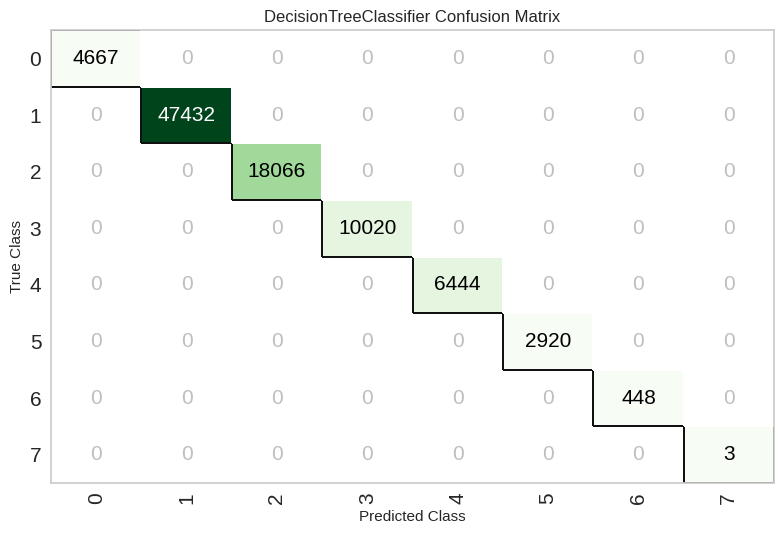

In [ ]:
# plot confusion matrix:
plot_model(best, plot = 'confusion_matrix')

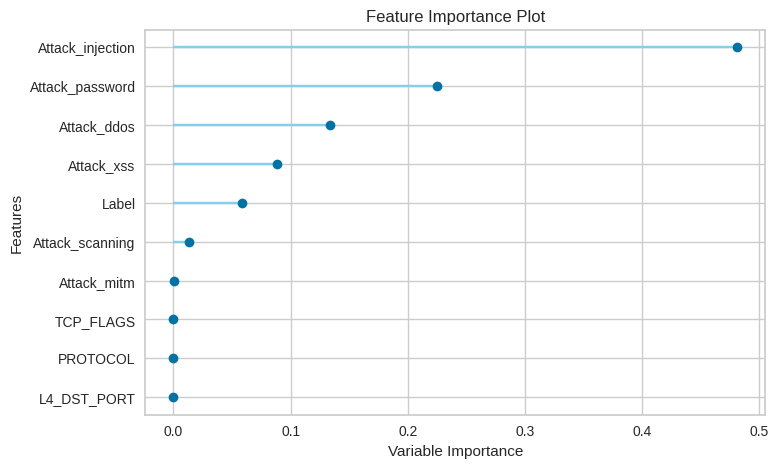

In [ ]:
# plot feature importance:
plot_model(best, plot = 'feature')

## ➡️ **Prediction**
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
# Show predictions df:
holdout_pred.head()

,L4_DST_PORT,PROTOCOL,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,malware_families_encoded,prediction_label,prediction_score
63762,80,6,27,6300,1,ddos,3,3,1.0
101875,80,6,18,1735,1,injection,1,1,1.0
99742,80,6,27,2117,1,injection,1,1,1.0
269049,80,6,27,293,1,injection,1,1,1.0
53032,80,6,19,135,1,password,2,2,1.0


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# Copy data and drop Class variable:

new_data = data.copy()

# new_data.drop('species', axis=1, inplace=True)
new_data.head()

,L4_DST_PORT,PROTOCOL,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,malware_families_encoded
0,443,6,24,327,0,Benign,0
1,15600,17,0,0,0,Benign,0
2,15600,17,0,0,0,Benign,0
3,138,17,0,0,0,Benign,0
4,15600,17,0,0,0,Benign,0


In [ ]:
# predict model on new_data:
predictions = predict_model(best, data = new_data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,L4_DST_PORT,PROTOCOL,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,malware_families_encoded,prediction_label,prediction_score
0,443,6,24,327,0,Benign,0,0,1.0
1,15600,17,0,0,0,Benign,0,0,1.0
2,15600,17,0,0,0,Benign,0,0,1.0
3,138,17,0,0,0,Benign,0,0,1.0
4,15600,17,0,0,0,Benign,0,0,1.0


import numpy as np
from google.colab import autoviz
df_3554647021160014912 = autoviz.get_df('df_3554647021160014912')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3554647021160014912, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5551418371499674609 = autoviz.get_df('df_5551418371499674609')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5551418371499674609, *['L4_DST_PORT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5420139370978446013 = autoviz.get_df('df_5420139370978446013')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5420139370978446013, *['PROTOCOL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5495828927271541843 = autoviz.get_df('df_5495828927271541843')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5495828927271541843, *['TCP_FLAGS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5706669854155627383 = autoviz.get_df('df_5706669854155627383')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5706669854155627383, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4669324205322633585 = autoviz.get_df('df_4669324205322633585')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4669324205322633585, *['L4_DST_PORT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8058272804256153580 = autoviz.get_df('df_8058272804256153580')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8058272804256153580, *['PROTOCOL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1504011322607618476 = autoviz.get_df('df_1504011322607618476')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1504011322607618476, *['TCP_FLAGS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6294471387671342710 = autoviz.get_df('df_6294471387671342710')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6294471387671342710, *[[['index', 'L4_DST_PORT'], ['L4_DST_PORT', 'PROTOCOL'], ['PROTOCOL', 'TCP_FLAGS'], ['TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1919299034774010213 = autoviz.get_df('df_1919299034774010213')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1919299034774010213, *['index', 'L4_DST_PORT', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8455823993463300685 = autoviz.get_df('df_8455823993463300685')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8455823993463300685, *['index', 'TCP_FLAGS', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6150842259608872874 = autoviz.get_df('df_6150842259608872874')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6150842259608872874, *['index', 'FLOW_DURATION_MILLISECONDS', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5360438987907325179 = autoviz.get_df('df_5360438987907325179')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5360438987907325179, *['index', 'count()', None], **{})
chart